## Приоритизация гипотез по увеличению выручки интернет-магазина, анализ A/B-теста

**Краткое описание проекта**

Заказчик исследования — крупный интернет-магазин.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Цель проекта**

Изучить данные и гипотезы, приоритизировать гипотезы при помощи фрейморков, провести анализ A/B-теста.

**Описание данных**

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Таблица orders содержит информацию о заказах пользователей в интернет-магазине:

    -transactionId - идентификатор заказа;
    -visitorId - идентификатор пользователя, совершившего заказ;
    -date - дата заказа;
    -revenue - выручка с заказа (средний чек);
    -group - группа A/B-теста (A или B).
    
Таблица visitors содержит информацию о посетителях интернет-магазина:

    -date - дата;
    -group - группа A/B-теста (A или B);
    -visitors - количество посетителей интернет-магазина в определённой группе A/B-теста в указанную дату.

**План работы**

1. Открыть файлы с данными.
2. Выполнить приоритизацию гипотез
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.
3. Провести A/B-тест
- Построить график кумулятивной выручки по группам.
- Построить график кумулятивного среднего чека по группам.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
- Построить график кумулятивного среднего количества заказов на посетителя по группам.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
- Построить точечный график количества заказов по пользователям.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
- Принять решение по результатам теста.
4. Написать общий вывод.

### Приоритизация гипотез

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')# читаем файл с данными и сохраняем в data

In [3]:
pd.set_option('display.max_colwidth', False)
data.head(5)# выводим первые 5 строк таблицы data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
data['ICE'] = round((data['Impact'] * data['Confidence'])/ data['Efforts'], 2)# посчитаем ICE для приоритизации гипотез

In [5]:
data[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)# выведем столбцы 'Hypothesis' и 'ICE', отсортированные по столбцу 'ICE'

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [6]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']# посчитаем RICE для приоритизации гипотез

In [7]:
data[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)# выведем столбцы 'Hypothesis' и 'RICE', отсортированные по столбцу 'RICE'

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении фреймворка ICE на первом месте находится 8-ая гипотеза, а при применении фреймворка RICE на первом месте находится 7-ая гипотеза, также порядок гипотез изменился при применени второго фреймворка. Это произошло из-за того, что в RICE  мы указали дополнительно параметр Reach, который учитывает охват пользователей, которых затронут гипотезы. А это очень важный параметр.

### Анализ A/B-теста

In [8]:
orders = pd.read_csv('/datasets/orders.csv')# читаем файл с данными и сохраняем в orders

In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')# читаем файл с данными и сохраняем в visitors

In [10]:
orders.head(5)# выводим первые 5 строк таблицы orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
# переименуем столбцы
orders = orders.rename(columns = {'transactionId':'transaction_id',
                                  'visitorId':'visitor_id'})

In [12]:
orders.head(5)# проверим переименование столбцов

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
visitors.head(5)# выводим первые 5 строк таблицы visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
orders.info()# выведем основную информацию о датафрейме orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
visitors.info()# выведем основную информацию о датафрейме visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
orders.isna().sum()# выведем количество пропущенных значений для каждого столбца таблицы orders

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [17]:
visitors.isna().sum()# выведем количество пропущенных значений для каждого столбца таблицы visitors

date        0
group       0
visitors    0
dtype: int64

In [18]:
orders.duplicated().sum()# выведем количество строк-дубликатов в данных

0

In [19]:
visitors.duplicated().sum()# выведем количество строк-дубликатов в данных

0

Мы ознакомились с данными. Вывели основную информацию о датафреймах и увидели, что таблица orders содержит 5 столбцов и 1197 строк, таблица visitors содержит 3 столбца и 62 строки. В данных нет пропусков и дубликатов. Также мы переименовали столбцы, где это было необходимо. Можно приступать к тестированию.

Посмотрим на даты теста.

In [20]:
pd.Series(orders['date'].unique()).sort_values().reset_index(drop=True)

0     2019-08-01
1     2019-08-02
2     2019-08-03
3     2019-08-04
4     2019-08-05
5     2019-08-06
6     2019-08-07
7     2019-08-08
8     2019-08-09
9     2019-08-10
10    2019-08-11
11    2019-08-12
12    2019-08-13
13    2019-08-14
14    2019-08-15
15    2019-08-16
16    2019-08-17
17    2019-08-18
18    2019-08-19
19    2019-08-20
20    2019-08-21
21    2019-08-22
22    2019-08-23
23    2019-08-24
24    2019-08-25
25    2019-08-26
26    2019-08-27
27    2019-08-28
28    2019-08-29
29    2019-08-30
30    2019-08-31
dtype: object

In [21]:
pd.Series(visitors['date'].unique()).sort_values()

0     2019-08-01
1     2019-08-02
2     2019-08-03
3     2019-08-04
4     2019-08-05
5     2019-08-06
6     2019-08-07
7     2019-08-08
8     2019-08-09
9     2019-08-10
10    2019-08-11
11    2019-08-12
12    2019-08-13
13    2019-08-14
14    2019-08-15
15    2019-08-16
16    2019-08-17
17    2019-08-18
18    2019-08-19
19    2019-08-20
20    2019-08-21
21    2019-08-22
22    2019-08-23
23    2019-08-24
24    2019-08-25
25    2019-08-26
26    2019-08-27
27    2019-08-28
28    2019-08-29
29    2019-08-30
30    2019-08-31
dtype: object

Тест начался 01.08.2019 года и закончился 31.08.2019 года.

In [22]:
orders.groupby('group')['transaction_id'].count()# посмотрим, сколько было покупок в группе A и B

group
A    557
B    640
Name: transaction_id, dtype: int64

Покупок в группе A было 557, в группе B было 640

In [23]:
visitors[visitors['group']=='A']['visitors'].sum()# посмотрим, сколько было посетителей в группе A

18736

Посетителей из группы A было 18736 человек.

In [24]:
visitors[visitors['group']=='B']['visitors'].sum()# посмотрим, сколько было посетителей в группе B

18916

Посетителей из группы B было 18916 человек.

In [25]:
visitors['visitors'].sum()# посмотрим, сколько было посетителей в обеих группах

37652

Всего посетителей было 37652 человек.

In [26]:
orders[np.logical_and(orders['group'] == 'A', orders['group'] == 'B')]['visitor_id']# проверим, не попадают ли какие-то пользователи в обе группы - по таблице с заказами

Series([], Name: visitor_id, dtype: int64)

Никакие пользователи не попадают в обе группы.

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]# создадим переменную с количеством посетителей в выбранную дату в группе A

In [28]:
# переименуем столбцы
visitorsADaily.columns = ['date', 'visitorsDateA']
visitorsADaily.head()

,date,visitorsDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


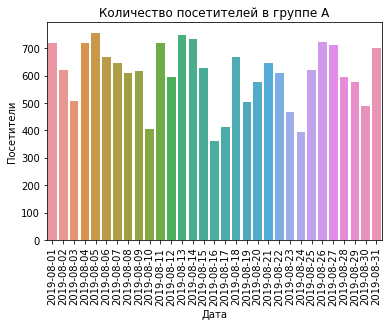

In [29]:
# посмотрим на количество посетителей группы A на столбчатой диаграмме
sns.barplot(data=visitorsADaily, x="date", y="visitorsDateA")
plt.xticks(rotation=90)
plt.title("Количество посетителей в группе A")
plt.xlabel("Дата")
plt.ylabel("Посетители");

Больше всего посетителей в группе A было 5 августа.

In [30]:
visitorsADaily.sort_values('visitorsDateA', ascending = False).head()# посмотрим, в какие даты было больше всего посетителей в группе A

,date,visitorsDateA
4,2019-08-05,756
12,2019-08-13,748
13,2019-08-14,735
25,2019-08-26,722
0,2019-08-01,719


Больше всего посетителей в группе A было 5 августа 2019 года - 756 человек.

In [31]:
visitorsACummulative = visitorsADaily.apply(lambda x:visitorsADaily[visitorsADaily['date']<= x['date']].agg({'date':'max','visitorsDateA':'sum'}),axis=1,)# создадим переменную c количеством пользователей в выбранную дату в группе A

In [32]:
# переименуем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [33]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]# создадим переменную с количеством посетителей в выбранную дату в группе B

In [34]:
# переименуем столбцы
visitorsBDaily.columns = ['date', 'visitorsDateB']
visitorsBDaily.head()

,date,visitorsDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


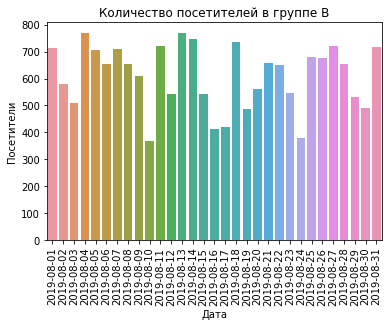

In [35]:
# посмотрим на количество посетителей группы B на столбчатой диаграмме
sns.barplot(data=visitorsBDaily, x="date", y="visitorsDateB")
plt.xticks(rotation=90)
plt.title("Количество посетителей в группе B")
plt.xlabel("Дата")
plt.ylabel("Посетители");

Больше всего посетителей в группе B было 4 августа.

In [36]:
visitorsBDaily.sort_values('visitorsDateB', ascending = False).head()# посмотрим, в какие даты было больше всего посетителей в группе B

,date,visitorsDateB
34,2019-08-04,770
43,2019-08-13,769
44,2019-08-14,746
48,2019-08-18,737
41,2019-08-11,721


Больше всего посетителей в группе B было 4 августа 2019 года - 770 человек.

In [37]:
visitorsBCummulative = visitorsBDaily.apply(lambda x:visitorsBDaily[visitorsBDaily['date']<= x['date']].agg({'date':'max','visitorsDateB':'sum'}),axis=1,)# создадим переменную c количеством пользователей в выбранную дату в группе B

In [38]:
# переименуем столбцы
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [39]:
ordersADaily = orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id':'nunique','revenue':'sum'})# cоздадим переменную c суммарной выручкой и с суммарным числом заказов в выбранную дату в группе A

In [40]:
# переименуем столбцы
ordersADaily.columns = ['date', 'ordersDateA', 'revenueDateA']
ordersADaily.head()

,date,ordersDateA,revenueDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


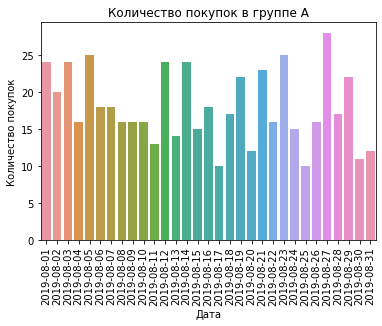

In [41]:
# посмотрим на количество покупок группы A на столбчатой диаграмме
sns.barplot(data=ordersADaily, x="date", y="ordersDateA")
plt.xticks(rotation=90)
plt.title("Количество покупок в группе А")
plt.xlabel("Дата")
plt.ylabel("Количество покупок");

Больше всего покупок в группе A было 27 августа.

In [42]:
ordersADaily.sort_values('ordersDateA', ascending = False).head()# посмотрим, в какие даты было больше всего покупок в группе А

,date,ordersDateA,revenueDateA
26,2019-08-27,28,286780
4,2019-08-05,25,124218
22,2019-08-23,25,117788
0,2019-08-01,24,148579
11,2019-08-12,24,249190


Больше всего покупок в группе A было 27 августа 2019 года - 28 на сумму 286780.

In [43]:
ordersACummulative = ordersADaily.apply(lambda x:ordersADaily[ordersADaily['date']<= x['date']].agg({'date':'max','ordersDateA':'sum', 'revenueDateA':'sum'}),axis=1,)# cоздадим переменную c суммарным числом заказов и с суммарной выручкой до выбранной даты включительно в группе A

In [44]:
# переименуем столбцы
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [45]:
ordersBDaily = orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False).agg({'transaction_id':'nunique','revenue':'sum'})# cоздадим переменную c суммарной выручкой и с суммарным числом заказов в выбранную дату в группе B

In [46]:
# переименуем столбцы
ordersBDaily.columns = ['date', 'ordersDateB', 'revenueDateB']
ordersBDaily.head()

,date,ordersDateB,revenueDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


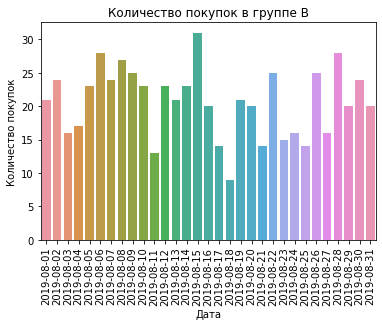

In [47]:
# посмотрим на количество покупок группы B на столбчатой диаграмме
sns.barplot(data=ordersBDaily, x="date", y="ordersDateB")
plt.xticks(rotation=90)
plt.title("Количество покупок в группе B")
plt.xlabel("Дата")
plt.ylabel("Количество покупок");

Больше всего покупок в группе B было 15 августа.

In [48]:
ordersBDaily.sort_values('ordersDateB', ascending = False).head()# посмотрим, в какие даты было больше всего покупок в группе B

,date,ordersDateB,revenueDateB
14,2019-08-15,31,342499
5,2019-08-06,28,242342
27,2019-08-28,28,96008
7,2019-08-08,27,220918
21,2019-08-22,25,162355


Больше всего покупок в группе B было 15 августа 2019 года - 31 на сумму 342499.

In [49]:
ordersBCummulative = ordersBDaily.apply(lambda x:ordersBDaily[ordersBDaily['date']<= x['date']].agg({'date':'max','ordersDateB':'sum', 'revenueDateB':'sum'}),axis=1,)# cоздадим переменную c суммарным числом заказов и с суммарной выручкой до выбранной даты включительно в группе B

In [50]:
# переименуем столбцы
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [51]:
# объединим все таблицы и сохраним их в data
data = (visitorsADaily.merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left'))\
.merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')\
.merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')\
.merge(ordersADaily, left_on = 'date', right_on = 'date', how = 'left')\
.merge(ordersBDaily, left_on = 'date', right_on = 'date', how = 'left')\
.merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')\
.merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')
data.head()

,date,visitorsDateA,visitorsDateB,visitorsCummulativeA,visitorsCummulativeB,ordersDateA,revenueDateA,ordersDateB,revenueDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,719,713,719,713,24,148579,21,101217,24,148579,21,101217
1,2019-08-02,619,581,1338,1294,20,93822,24,165531,44,242401,45,266748
2,2019-08-03,507,509,1845,1803,24,112473,16,114248,68,354874,61,380996
3,2019-08-04,717,770,2562,2573,16,70825,17,108571,84,425699,78,489567
4,2019-08-05,756,707,3318,3280,25,124218,23,92428,109,549917,101,581995


Тест начался 01.08.2019 года и закончился 31.08.2019 года. Покупок в группе A было 557, в группе B было 640. Всего посетителей было 37652 человека. Из них в группе A - 18736 человек, в группе B - 18916 человек. Больше всего посетителей в группе A было 5 августа 2019 года - 756 человек. Больше всего посетителей в группе B было 4 августа 2019 года - 770 человек. Больше всего покупок в группе A было 27 августа 2019 года - 28 на сумму 286780. Больше всего покупок в группе B было 15 августа 2019 года - 31 на сумму 342499. Мы создали переменные с количеством посетителей и покупок в группах, а также переменные с кумулятивным количеством посетителей и покупок в группах, и все объединили в один датафрейм. Теперь можно посмотреть на кумулятивные графики.

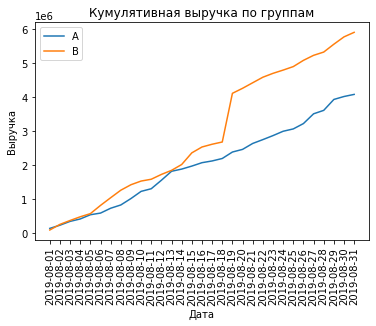

In [52]:
# построим график кумулятивной выручки по группам
plt.plot(data['date'], data['revenueCummulativeA'], label = 'A')
plt.plot(data['date'], data['revenueCummulativeB'], label = 'B')
plt.xticks(rotation = 90)
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend();

Группа B лучше по накопленным показателям, чем группа A. Выручка в целом равномерно увеличивается, но есть резкий скачок в группе B, это может говорить об увеличении числа заказов или о дорогих заказах в выборке. Проверим такой скачок на выбросы чуть позже.

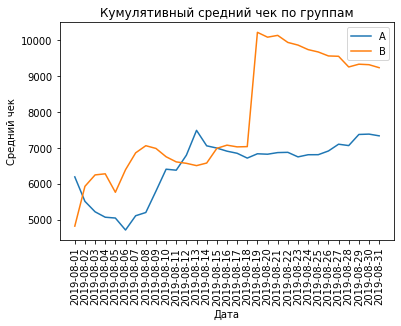

In [53]:
# построим график кумулятивного среднего чека по группам
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label = 'A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label = 'B')
plt.xticks(rotation = 90)
plt.title("Кумулятивный средний чек по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.legend();

Средний чек становится равномерным к концу теста. Падает для группы B и растет для группы A. Есть резкие всплески на графике, поэтому проверим данные на аномалии чуть позже.

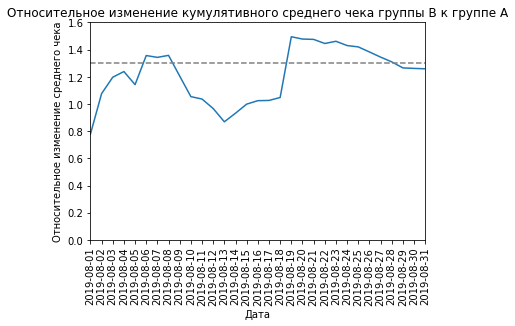

In [54]:
# построим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/((data['revenueCummulativeA']/data['ordersCummulativeA'])-1))
plt.xticks(rotation = 90)
plt.xlabel("Дата")
plt.ylabel("Относительное изменение среднего чека")
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.axis(["2019-08-01", '2019-08-31', 0, 1.6])
plt.axhline(y=1.3, color='grey', linestyle='--');

В некоторых точках график сильно скачет, это говорит о выбросах в данных.

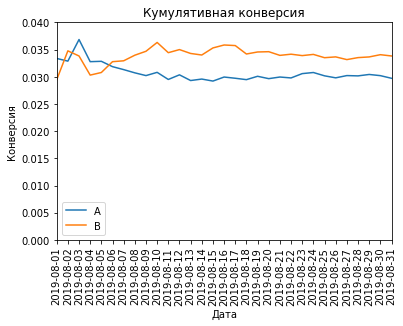

In [55]:
# построим график кумулятивного среднего количества заказов на посетителя по группам
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], label = 'A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], label = 'B')
plt.xticks(rotation = 90)
plt.title("Кумулятивная конверсия")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.axis(["2019-08-01", '2019-08-31', 0, 0.040]) 
plt.legend();

Сначала конверсия группы A была выше, затем она зафиксировалась и стала ниже конверсии группы B. Но обе к концу начали снижаться.

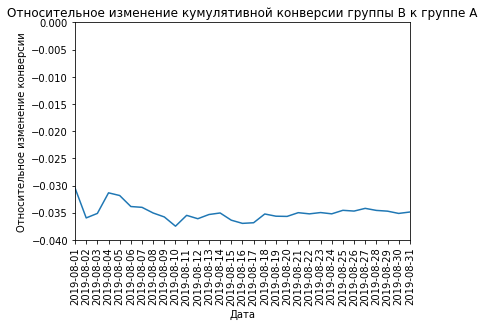

In [56]:
# построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.plot(data['date'], (data['ordersCummulativeB']/data['visitorsCummulativeB'])/((data['ordersCummulativeA']/data['visitorsCummulativeA'])-1))
plt.xticks(rotation = 90)
plt.title("Относительное изменение кумулятивной конверсии группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение конверсии")
plt.axis(["2019-08-01", '2019-08-31', -0.040, 0]) ;

Отношение конверсии сначала снижалось, а дальше стабилизировалось и начало расти.

Группа B лучше по накопленным показателям выручки, чем группа A. Выручка в целом равномерно увеличивается, но есть резкий скачок в группе B, это может говорить об увеличении числа заказов или о дорогих заказах в выборке. Средний чек становится равномерным к концу теста. Падает для группы B и растет для группы A. В графике относительного изменения кумулятивного среднего чека группы B к группе A в некоторых точках график сильно скачет, это говорит о выбросах в данных. Сначала конверсия группы A была выше, затем она зафиксировалась и стала ниже конверсии группы B. Но обе к концу начали снижаться. Отношение конверсии сначала снижалось, а дальше стабилизировалось и начало расти.

Проверим дальше данные на аномалии, на графиках есть резкие скачки, что говорит о выбросах в данных.

In [57]:
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})# cоздадим переменную c числом совершённых заказов пользователей

In [58]:
# переименуем столбцы
ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [59]:
# построим точечный график количества заказов по пользователям
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))

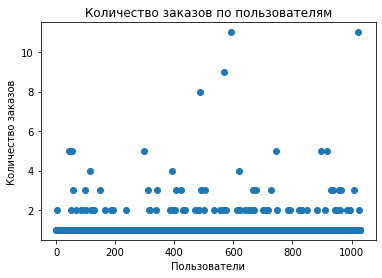

In [60]:
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Количество заказов по пользователям")
plt.xlabel("Пользователи")
plt.ylabel("Количество заказов");

Есть пользователи с 3-5 заказами, посмотрим дальше, можно ли считать их аномалиями, так как доля таких пользователей не ясна.

In [61]:
np.percentile(ordersByUsers['orders'], [95, 99])# посчитаем 95-й и 99-й перцентили количества заказов на пользователя

array([2., 4.])

Не более 5% пользователей оформляли 2 заказа и не более 1% оформляли 4 заказа. Примем 4 заказа за верхнюю границу и отсеим аномальных пользователей по ней.

In [62]:
# построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))

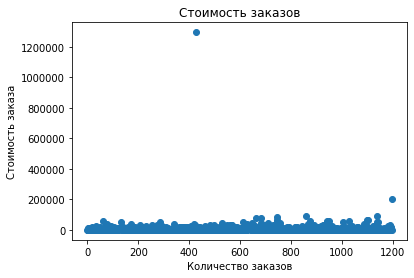

In [63]:
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders['revenue'])
plt.title("Стоимость заказов")
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость заказа");

Есть дорогой заказ выше 1200000. Также нужно рассмотреть график поближе, так как остальные точки сильно сливаются.

In [64]:
# рассмотрим график поближе
x_values = pd.Series(range(0,len(orders[orders['revenue']<= 100000]['revenue'])))

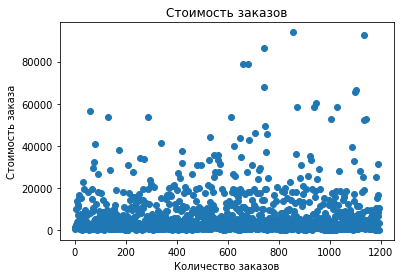

In [65]:
plt.scatter(x_values, orders[orders['revenue']<= 100000]['revenue'])
plt.title("Стоимость заказов")
plt.xlabel("Количество заказов")
plt.ylabel("Стоимость заказа");

При увеличении графика стало видно, что есть много заказов стоимостью 30000-60000. Посмотрим долю таких заказов дальше, чтобы точно определить границу.

In [66]:
np.percentile(orders['revenue'], [95, 99])# посчитаем 95-й и 99-й перцентили стоимости заказов

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000, не более 1 % дороже 58 233.2. Примем заказы стоимостью 40 000 за верхнюю границу и отсеим аномальных пользователей по ней.

In [67]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})# cоздадим переменную c числом совершённых заказов пользователей группы A

In [68]:
# переименуем столбцы
ordersByUsersA.columns = ['visitor_id', 'orders']
ordersByUsersA.head()

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [69]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})# cоздадим переменную c числом совершённых заказов пользователей группы B

In [70]:
# переименуем столбцы
ordersByUsersB.columns = ['visitor_id', 'orders']
ordersByUsersB.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [71]:
# cоздадим переменную c количеством заказов пользователей группы A
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [72]:
# cоздадим переменную c количеством заказов пользователей группы B
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

Проверим статистическую значимость различий в среднем числе заказов между сегментами.

Нулевая гипотеза: различий в среднем числе заказов между группами нет. Альтернативная гипотеза: различия в числе заказов между группами есть.

Рассчитывать статистическую значимость будем по непараметрическому тесту Уилкоксона-Манна-Уитни.
Зададим уровень статистической значимости α = 0.05.

In [73]:
"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])# посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

'0.017'

In [74]:
"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)# выведем относительный прирост среднего числа заказов группы B

'0.138'

0.017(P-value) < 0.05(α). Есть статистически значимое различие по среднему количеству заказов между группами по «сырым» данным. Относительный выигрыш группы B равен равен 13.8% (0.138 - второе число, которое мы нашли).

Теперь проверим статистическую значимость различий в среднем чеке. 

Нулевая гипотеза: различий в среднем чеке между группами нет. 
Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [75]:
"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1])# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

'0.729'

In [76]:
"{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1)# найдём относительные различия в среднем чеке между группами

'0.259'

0.729(P-value) > 0.05(α). Нет статистически значимого различия по среднему чеку между группами по «сырым» данным, но есть высокое относительное различие в 25.9% группы B относительно группы A. (0.259 - второе число, которое мы нашли).

Уберем аномалии в данных и посчитаем статистическую значимость по "очищенным" данным.

In [77]:
# cделаем срез пользователей с числом заказов больше 3
usersWithManyOrders = ordersByUsers[ordersByUsers['orders'] > 3]['visitor_id']
usersWithManyOrders

44      199603092 
55      237748145 
114     457167155 
299     1230306981
393     1614305549
487     2038680547
569     2378935119
591     2458001652
619     2587333274
744     3062433592
897     3717692402
917     3803269165
1023    4256040402
Name: visitor_id, dtype: int64

In [78]:
# cделаем срез пользователей, совершивших заказы дороже 40 000
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitor_id']
usersWithExpensiveOrders

60      4256040402
78      3288820196
131     2254586615
287     2254456485
339     834731816 
425     1920142716
530     2912540959
613     3931967268
648     382846391 
662     4266935830
682     4266935830
684     358944393 
709     950626008 
743     4133034833
744     888512513 
746     3321013705
755     2279926127
858     1316129916
873     4256040402
940     4003628586
949     887908475 
1006    2261934787
1029    2378935119
1099    148427295 
1103    1164614297
1136    1307669133
1137    759473111 
1142    2606908679
1196    2108080724
Name: visitor_id, dtype: int64

In [79]:
# объединим срезы пользователей в таблице abnormal
abnormal = pd.concat([usersWithManyOrders,usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
abnormal

1099    148427295 
44      199603092 
55      237748145 
684     358944393 
648     382846391 
114     457167155 
1137    759473111 
339     834731816 
949     887908475 
744     888512513 
709     950626008 
1103    1164614297
299     1230306981
1136    1307669133
858     1316129916
393     1614305549
425     1920142716
487     2038680547
1196    2108080724
287     2254456485
131     2254586615
1006    2261934787
755     2279926127
569     2378935119
591     2458001652
619     2587333274
1142    2606908679
530     2912540959
744     3062433592
78      3288820196
746     3321013705
897     3717692402
917     3803269165
613     3931967268
940     4003628586
743     4133034833
1023    4256040402
662     4266935830
Name: visitor_id, dtype: int64

In [80]:
abnormal.shape[0]# узнаем, сколько всего аномальных пользователей

38

Всего 38 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста.

In [81]:
# cоздадим переменную c количеством заказов пользователей группы A, исключив аномальных пользователей
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormal))]['orders'],pd.Series(0, index=np.arange(data['visitorsDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleAFiltered                                   

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18707, dtype: int64

In [82]:
# cоздадим переменную c количеством заказов пользователей группы B, исключив аномальных пользователей
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormal))]['orders'],pd.Series(0, index=np.arange(data['visitorsDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18892, dtype: int64

Проверим статистическую значимость различий в среднем числе заказов между сегментами по "очищенным" данным.

Нулевая гипотеза: различий в среднем числе заказов между группами нет. Альтернативная гипотеза: различия в числе заказов между группами есть.

In [83]:
"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])# посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

'0.009'

In [84]:
"{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)# выведем относительный прирост среднего числа заказов группы B

'0.164'

0.009(P-value) < 0.05(α), показатель еще сильнее уменьшился. Есть статистически значимое различие по среднему количеству заказов между группами по «очищенным» данным. Относительный выигрыш группы B увеличился до 16.4% (0.164 - второе число, которое мы нашли). Группа B здесь явно лучше группы A. 

Теперь проверим статистическую значимость различий в среднем чеке по "очищенным" данным.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [85]:
"{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal)))]['revenue'], orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormal)))]['revenue'])[1])# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

'0.843'

In [86]:
"{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormal)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal)))]['revenue'].mean() - 1)# найдём относительные различия в среднем чеке между группами

'0.055'

0.843(P-value) > 0.05(α). Все так же нет статистически значимого различия по среднему чеку между группами по «очищенным» данным, но снизилось относительное различие до 5.5% (0.055 - второе число, которое мы нашли).

### Общий вывод: 

При применении фреймворка ICE на первом месте находится 8-ая гипотеза, а при применении фреймворка RICE на первом месте находится 7-ая гипотеза, также порядок гипотез изменился при применени второго фреймворка. Это произошло из-за того, что в RICE мы указали дополнительно параметр Reach, который учитывает охват пользователей, которых затронут гипотезы. А это очень важный параметр.

При проведении A/B-теста до и после очистки данных группа B лидировала по среднему количеству заказов, кумулятивная метрика конверсии тоже лучше в группе B, поэтому тест можем остановить и зафиксировать победу группы B.